In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import data_utils.data_analysis as data_analysis
import models.tools as models_tools

In [2]:
filename='datasets/galadriel_dataset_24_03_14.h5'
df_input,df_time_val,df_time,df_freq_val,df_freq_int = data_analysis.read_dataset(filename)

Input DF
       shot number  order2  order3     order4
0             4731   34900  -17000 -3700000.0
1             4733   34900  -17000 -4600000.0
2             4734   34900  -17000 -4600000.0
3             4735   34900  -17000 -4600000.0
4             4736   34900  -17000 -4500000.0
...            ...     ...     ...        ...
12156        17147   35300   20000 -3800000.0
12157        17148   35300   20000 -3800000.0
12158        17149   35300   20000 -3800000.0
12159        17150   35300   20000 -3700000.0
12160        17151   35300   20000 -3700000.0

[12161 rows x 4 columns]
----
Time values
0    -94.466005
1    -83.969782
2    -73.473559
3    -62.977336
4    -52.481114
5    -41.984891
6    -31.488668
7    -20.992445
8    -10.496223
9      0.000000
10    10.496223
11    20.992445
12    31.488668
13    41.984891
14    52.481114
15    62.977336
16    73.473559
17    83.969782
18    94.466005
Name: 0, dtype: float64
----
Intensity
             0         1         2         3         

In [3]:
#Get the clean shots
minval=8000
df_input_clean,df_time_clean,df_freq_int_clean=data_analysis.clean_shots_below(minval,df_input,df_time,df_freq_int)


Shots with max val below this will be discarded: 8000



In [4]:
df_time_clean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.020483,0.015633,0.020804,0.023678,0.166658,0.112098,0.008360,0.265105,0.811617,1.000000,0.548914,0.133224,0.020927,0.008710,0.009739,0.005026,0.000250,0.003057,0.002962
1,0.022322,0.018719,0.022360,0.026733,0.171019,0.110176,0.006904,0.270487,0.818075,1.000000,0.552507,0.138130,0.021905,0.008509,0.009772,0.005012,0.000433,0.003760,0.003598
2,0.021571,0.017741,0.020970,0.027263,0.181804,0.120254,0.007778,0.276644,0.824608,1.000000,0.550096,0.137816,0.023370,0.010535,0.011883,0.005926,0.000578,0.003401,0.003854
3,0.006165,0.008668,0.015947,0.020773,0.187935,0.144496,0.009901,0.369212,0.947268,1.000000,0.480506,0.102585,0.025139,0.016277,0.008626,0.000792,0.004226,0.004048,0.000895
4,0.014177,0.021206,0.023145,0.035994,0.239269,0.135001,0.022481,0.383279,0.922868,1.000000,0.499196,0.107917,0.023485,0.022253,0.015847,0.002396,0.004927,0.001513,0.001718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,0.000081,0.001195,0.010204,0.023177,0.015640,0.025360,0.112122,0.291492,0.637284,1.000000,0.930220,0.472285,0.148387,0.078252,0.065446,0.048327,0.026633,0.007656,0.003423
12146,0.000079,0.000926,0.009772,0.021289,0.011771,0.023515,0.105938,0.275076,0.629608,1.000000,0.911338,0.447202,0.139272,0.073970,0.059556,0.044422,0.023392,0.005908,0.002892
12147,0.000190,0.002797,0.004494,0.017058,0.022993,0.008659,0.129312,0.249166,0.515231,1.000000,0.904923,0.375280,0.097221,0.058364,0.062067,0.056689,0.037244,0.011155,0.004559
12148,0.001309,0.021313,0.038438,0.031800,0.120421,0.046418,0.275574,0.774471,0.822312,0.916404,1.000000,0.687133,0.333589,0.162015,0.126573,0.144024,0.122938,0.081716,0.062803


In [5]:
time_norm=df_time_clean.to_numpy()
time_norm=StandardScaler().fit_transform(time_norm)

In [6]:
time_norm

array([[ 1.03023829e+01,  3.39988779e+00,  7.48162835e-01, ...,
        -8.36001558e-01, -3.84847008e-01, -3.19425307e-01],
       [ 1.12960439e+01,  4.21763540e+00,  8.94792675e-01, ...,
        -8.30248855e-01, -3.57508266e-01, -2.68409279e-01],
       [ 1.08902585e+01,  3.95847884e+00,  7.63805864e-01, ...,
        -8.25690703e-01, -3.71469302e-01, -2.47874526e-01],
       ...,
       [-6.62468050e-01, -1.47587534e-03, -7.88811908e-01, ...,
         3.26924665e-01, -6.99264727e-02, -1.91323742e-01],
       [-5.78424024e-02,  4.90500977e+00,  2.40990487e+00, ...,
         3.02076150e+00,  2.67409772e+00,  4.48065344e+00],
       [-1.68069062e-01,  4.24148416e+00,  2.13266516e+00, ...,
         2.40195297e+00,  1.93470723e+00,  3.22835436e+00]])

### Testing PCA

In [7]:
#Testing the number of components
pca = PCA(n_components=12)
pca_time = pca.fit_transform(time_norm)

In [8]:
pca_time

array([[ 5.10221652e+00,  1.44577509e+00,  6.29771934e-01, ...,
         7.48798578e-01, -6.43584300e-01,  2.59975228e+00],
       [ 5.48920132e+00,  1.88616482e+00,  5.74599854e-01, ...,
         8.52065293e-01, -6.59748430e-01,  3.03515064e+00],
       [ 5.46190869e+00,  1.92561973e+00,  6.36523640e-01, ...,
         8.08772720e-01, -6.79907034e-01,  2.61824688e+00],
       ...,
       [-2.75707825e+00, -7.61074257e-01, -1.79964282e+00, ...,
         3.94354075e-01, -3.39013977e-01,  5.71047173e-03],
       [-2.99470267e+00,  9.91737483e+00, -2.11743551e+00, ...,
         1.08909399e+00,  1.27135392e+00,  6.84019852e-02],
       [-2.81081449e+00,  7.78420503e+00, -2.47427366e+00, ...,
         6.26224756e-01,  8.34655474e-01,  4.69397102e-01]])

Text(0, 0.5, 'cumulative explained variance')

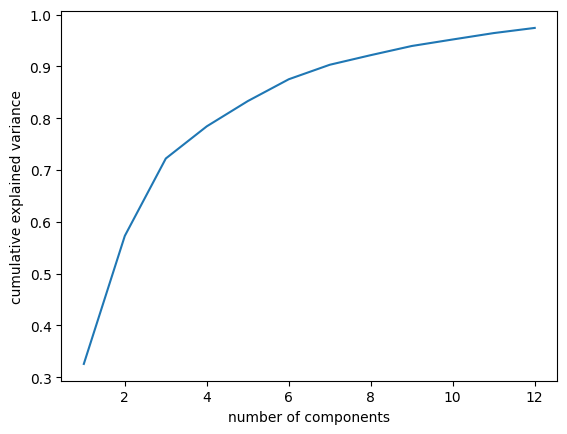

In [9]:
x=np.linspace(1,12,12)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'Second component')

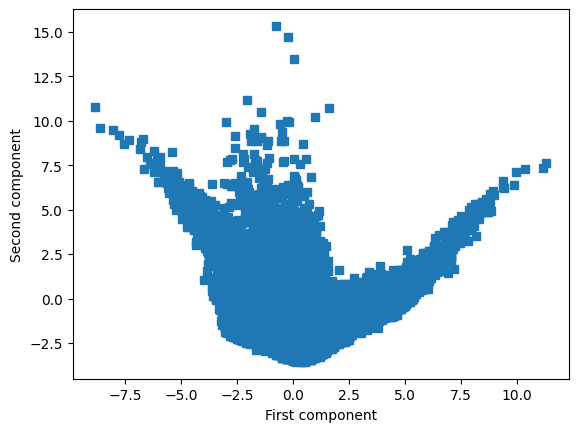

In [10]:
plt.plot(pca_time[:,0],pca_time[:,1],marker='s',linestyle='None')
plt.xlabel('First component')
plt.ylabel('Second component')

Text(0, 0.5, 'Third component')

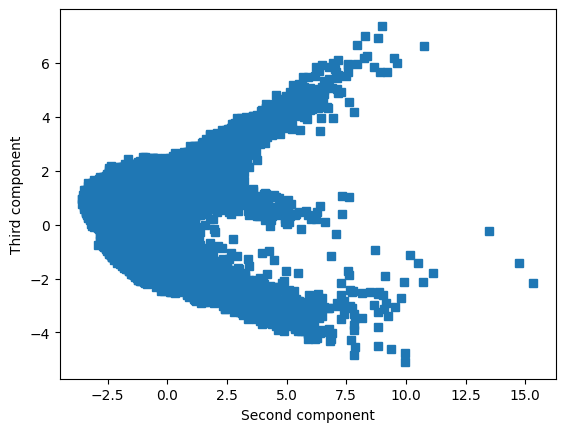

In [11]:
plt.plot(pca_time[:,1],pca_time[:,2],marker='s',linestyle='None')
plt.xlabel('Second component')
plt.ylabel('Third component')

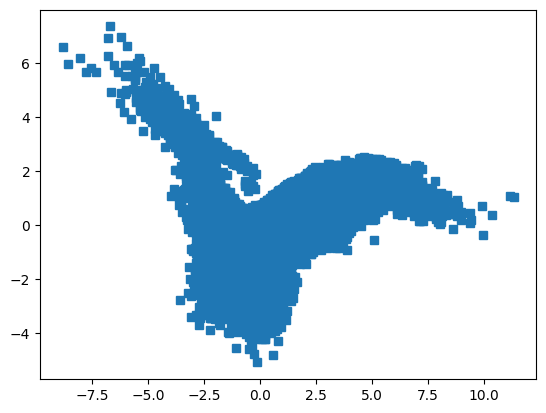

In [12]:
plt.plot(pca_time[:,0],pca_time[:,2],marker='s',linestyle='None')

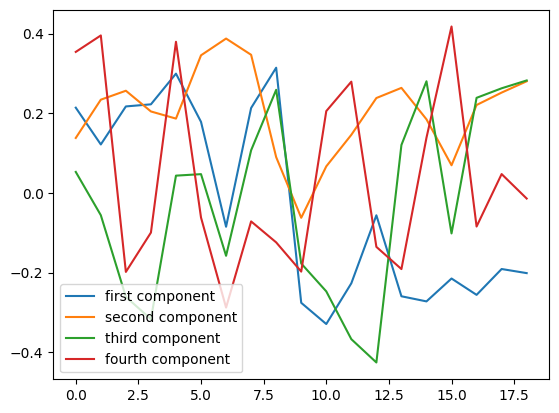

In [13]:
plt.plot(pca.components_[0],label='first component')
plt.plot(pca.components_[1],label='second component')
plt.plot(pca.components_[2],label='third component')
plt.plot(pca.components_[3],label='fourth component')
plt.legend()

## Train the roundtrip model

In [14]:
def train_roundtrip(df_input,df_time):
    #split the dataset (X:dazzler param, Y:wizzler)
    X_train, X_test, y_train, y_test=models_tools.split_dataset_roundtrip(df_input,df_time,rand_split=False)
    #Reset the index on y_test to have the same indexes as y_predict
    y_test_reset=y_test.reset_index(drop=True)

    #train forward model with Random forest
    n_estimators = 300
    max_features = 'sqrt'
    max_depth=20
    random_state=18

    #train roadtrip model
    rf_model_forward,rf_model_backward = models_tools.train_roundtrip_rf(X_train, X_test, y_train, y_test,
                                                            n_estimators, max_features,max_depth, random_state)
    #roundtrip prediction
    y_predict_roundtrip=models_tools.roundtrip_rf_predict(y_test,rf_model_backward,rf_model_forward)
    
    #study the erro distribution
    df_error_roundtrip_forest=abs(y_test_reset-y_predict_roundtrip)
    df_error_roundtrip_forest=df_error_roundtrip_forest.sum(axis=1)/y_test.shape[1] #sum error / num columns

    return y_test_reset,y_predict_roundtrip,df_error_roundtrip_forest

In [15]:
def train_roundtrip_pca(df_input,df_time,pca_comp):
    #split the dataset (X:dazzler param, Y:wizzler)
    X_train, X_test, y_train, y_test=models_tools.split_dataset_roundtrip(df_input,df_time,rand_split=False)
    #Reset the index on y_test to have the same indexes as y_predict
    y_test_reset=y_test.reset_index(drop=True)

    #normalize the y (use same transform for test)
    scaler=StandardScaler()
    y_train_norm = scaler.fit_transform(y_train)
    y_test_norm = scaler.transform(y_test)


    #convert y to pca space using y_train_morm
    pca=PCA(n_components=pca_comp).fit(y_train_norm)
    y_train_pca=pca.transform(y_train_norm)
    y_test_pca=pca.transform(y_test_norm)

    #train forward model with Random forest
    n_estimators = 300
    max_features = 'sqrt'
    max_depth=15
    random_state=18

    #train roadtrip model
    rf_model_forward,rf_model_backward = models_tools.train_roundtrip_rf(X_train, X_test, y_train_pca, y_test_pca,
                                                            n_estimators, max_features,max_depth, random_state)
    #roundtrip prediction
    y_predict_roundtrip=models_tools.roundtrip_rf_predict(y_test_pca,rf_model_backward,rf_model_forward)

    #Inverse transform to real space
    y_predict_ori = pca.inverse_transform(y_predict_roundtrip)
    #y_test_reset_ori = pca.inverse_transform(y_test_reset)
    #and rescale
    y_predict_ori=scaler.inverse_transform(y_predict_ori)
    #y_test_reset_ori=scaler.inverse_transform(y_test_reset_ori)
    #print(y_predict_ori)
    #print(y_test_reset_ori)
    
    #study the erro distribution
    df_error_roundtrip_forest=abs(y_test_reset-y_predict_ori)
    df_error_roundtrip_forest=df_error_roundtrip_forest.sum(axis=1)/y_test_reset.shape[1] #sum error / num columns
    df_error_roundtrip_forest=pd.Series(df_error_roundtrip_forest)
    return pd.DataFrame(y_test_reset),pd.DataFrame(y_predict_ori),df_error_roundtrip_forest

In [16]:
#train the original model (with normalized intensity)
#df_time_norm=pd.DataFrame(time_norm)
#print(df_time_norm)
y_test_reset_original,y_predict_roundtrip_original,df_error_roundtrip_original=train_roundtrip(df_input_clean,df_time_clean)
#df_error_roundtrip_original=train_roundtrip(df_input_clean,df_time_norm)

/home/javierhn/venv_galadriel/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [17]:
#train the model with pca
#df_error_roundtrip_pca2=train_roundtrip(df_input_clean,df_time_pca2)
y_test_reset_pca2,y_predict_pca2,df_error_roundtrip_pca2=train_roundtrip_pca(df_input_clean,df_time_clean,2)
#y_test_reset_pca3,y_predict_pca3,df_error_roundtrip_pca3=train_roundtrip_pca(df_input_clean,df_time_clean,3)
y_test_reset_pca4,y_predict_pca4,df_error_roundtrip_pca4=train_roundtrip_pca(df_input_clean,df_time_clean,4)
y_test_reset_pca5,y_predict_pca5,df_error_roundtrip_pca5=train_roundtrip_pca(df_input_clean,df_time_clean,5)
#y_test_reset_pca6,y_predict_pca6,df_error_roundtrip_pca6=train_roundtrip_pca(df_input_clean,df_time_clean,6)
y_test_reset_pca7,y_predict_pca7,df_error_roundtrip_pca7=train_roundtrip_pca(df_input_clean,df_time_clean,7)


/home/javierhn/venv_galadriel/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/javierhn/venv_galadriel/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/javierhn/venv_galadriel/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/javierhn/venv_galadriel/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


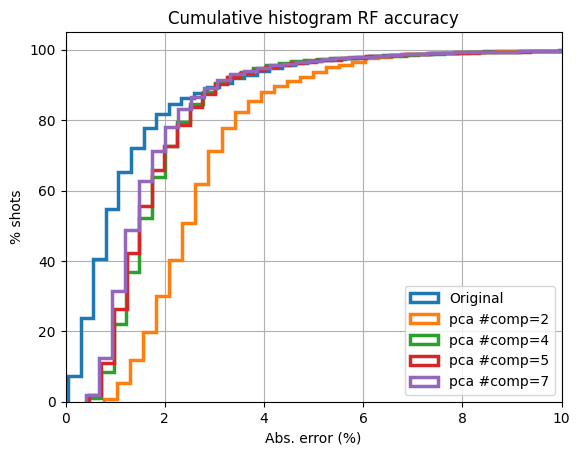

In [18]:
weights_original = 100*np.ones_like(df_error_roundtrip_original) / len(df_error_roundtrip_original)
weights_pca2 = 100*np.ones_like(df_error_roundtrip_pca2) / len(df_error_roundtrip_pca2)
#weights_pca3 = 100*np.ones_like(df_error_roundtrip_pca3) / len(df_error_roundtrip_pca3)
weights_pca4 = 100*np.ones_like(df_error_roundtrip_pca4) / len(df_error_roundtrip_pca4)
weights_pca5 = 100*np.ones_like(df_error_roundtrip_pca5) / len(df_error_roundtrip_pca5)
#weights_pca6 = 100*np.ones_like(df_error_roundtrip_pca6) / len(df_error_roundtrip_pca6)
weights_pca7 = 100*np.ones_like(df_error_roundtrip_pca7) / len(df_error_roundtrip_pca7)
(100*df_error_roundtrip_original).hist(bins=50,weights=weights_original,cumulative=True,histtype="step",linewidth=2.5,label='Original')
(100*df_error_roundtrip_pca2).hist(bins=50,weights=weights_pca2,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=2')
#(100*df_error_roundtrip_pca3).hist(bins=50,weights=weights_pca3,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=3')
(100*df_error_roundtrip_pca4).hist(bins=50,weights=weights_pca4,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=4')
(100*df_error_roundtrip_pca5).hist(bins=50,weights=weights_pca5,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=5')
#(100*df_error_roundtrip_pca6).hist(bins=50,weights=weights_pca6,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=6')
(100*df_error_roundtrip_pca7).hist(bins=50,weights=weights_pca7,cumulative=True,histtype="step",linewidth=2.5,label='pca #comp=7')


plt.ylabel('% shots')
plt.xlabel('Abs. error (%)')
plt.title('Cumulative histogram RF accuracy')
plt.xlim(0,10)
plt.legend()
plt.show()

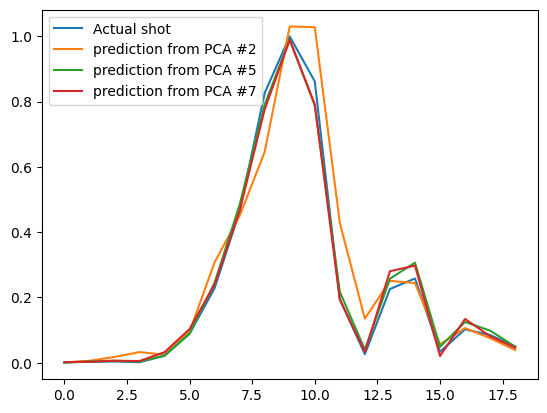

In [19]:
shot_ind=550
plt.plot(y_test_reset_original.loc[shot_ind],label='Actual shot')
plt.plot(y_predict_pca2.loc[shot_ind],label='prediction from PCA #2')
plt.plot(y_predict_pca5.loc[shot_ind],label='prediction from PCA #5')
plt.plot(y_predict_pca7.loc[shot_ind],label='prediction from PCA #7')
plt.legend()